In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

cosm = 'fiducial'
simnum = 0
ns = 10000
rbin = 8
rmin, rmax = 3., 25.
njk = 10
#filename = f'../data/vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{simnum}.dat'
filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'

filelist = os.listdir(filedir)
nsim = len(filelist)

chis = []

# Read all files
for file in filelist:
    data = ascii.read(filedir+file)
    chis.append( data['chi'] )

# Calculate the covariance summation and covariance proper
cov = np.zeros((rbin,rbin))
chis_mean = np.mean(chis,axis=0)
for i in range(rbin):
    for j in range(rbin):
        for k in range(nsim):
            a = (chis[k][i]-chis_mean[i])
            b = (chis[k][j]-chis_mean[j])
            cov[i][j] += a*b
cov = cov/(nsim-1)

# Calculate chi squared
chisq = []
for i in range(nsim):
    a = np.transpose(np.asarray(chis[i])-chis_mean)
    b = (np.asarray(chis[i])-chis_mean)
    c = np.linalg.inv(cov)
    chisq.append( np.dot(a,c) * b )


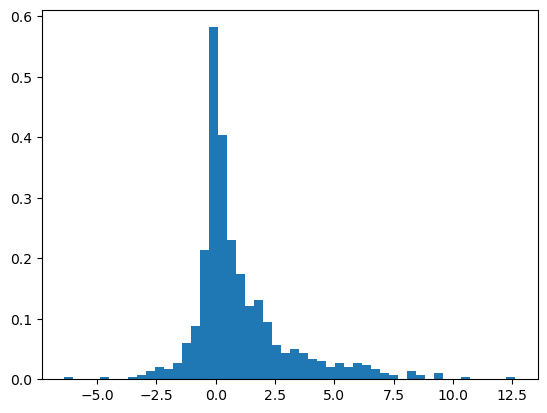

In [19]:

plt.hist(np.asarray(chisq).flatten(),bins=50,color=['C00'],density=True)
plt.show()
